In [1]:
import sys
import numpy as np
import warnings
import time
import os
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

import muller


### **MULLER: A Multimodal Data Lake Format for Collaborative AI Data Workflows**

### 1. Read From Raw Files 

This section demonstrates the read functions. Currently, we support the followring sample types

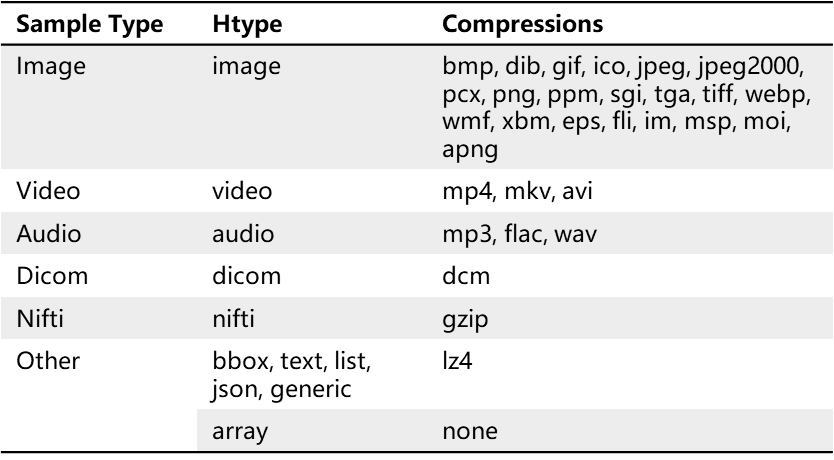

#### 1.1 Read from Local Path

In [78]:
test_sample = muller.read(path="/data/demo_test/cat-front.jpg")
print(test_sample.shape) 
print(test_sample.array)

(425, 640, 3)
[[[129 135 135]
  [129 135 135]
  [129 135 133]
  ...
  [240 240 230]
  [240 240 230]
  [240 240 230]]

 [[130 136 136]
  [130 136 136]
  [130 136 134]
  ...
  [240 240 230]
  [240 240 230]
  [240 240 230]]

 [[130 136 136]
  [130 136 136]
  [130 136 134]
  ...
  [240 240 230]
  [240 240 230]
  [240 240 230]]

 ...

 [[150 121 103]
  [151 122 104]
  [138 109  93]
  ...
  [166 179 172]
  [167 178 174]
  [167 178 174]]

 [[135 108  91]
  [140 113  96]
  [131 103  89]
  ...
  [166 179 172]
  [167 178 174]
  [167 178 174]]

 [[121  95  82]
  [125  99  86]
  [122  95  84]
  ...
  [167 180 173]
  [168 179 175]
  [168 179 175]]]


#### 1.2 Read from http/https. Note: You may need to use the proxies info as credential information.

In [4]:
test_sample_1 = muller.read(path="https://onlinejpgtools.com/images/examples-onlinejpgtools/cat-front.jpg",
                           creds=credential_info)
print(f'test_sample_1.array:{test_sample_1.array}')

test_sample_1.array:[[[129 135 135]
  [129 135 135]
  [129 135 133]
  ...
  [240 240 230]
  [240 240 230]
  [240 240 230]]

 [[130 136 136]
  [130 136 136]
  [130 136 134]
  ...
  [240 240 230]
  [240 240 230]
  [240 240 230]]

 [[130 136 136]
  [130 136 136]
  [130 136 134]
  ...
  [240 240 230]
  [240 240 230]
  [240 240 230]]

 ...

 [[150 121 103]
  [151 122 104]
  [138 109  93]
  ...
  [166 179 172]
  [167 178 174]
  [167 178 174]]

 [[135 108  91]
  [140 113  96]
  [131 103  89]
  ...
  [166 179 172]
  [167 178 174]
  [167 178 174]]

 [[121  95  82]
  [125  99  86]
  [122  95  84]
  ...
  [167 180 173]
  [168 179 175]
  [168 179 175]]]


#### 1.3 Read from Roma (with credential information). 

* The default reading

In [2]:
test_sample_2 = muller.read(path="roma://mullerf_test_data_01/test/dog.157.jpg",
                           creds=credential_info)
print(f'test_sample_2.array:{test_sample_2.array}')

test_sample_2.array:[[[183 160 118]
  [223 201 160]
  [211 189 150]
  ...
  [215 218 161]
  [227 230 173]
  [171 174 117]]

 [[211 189 148]
  [199 177 138]
  [164 144 107]
  ...
  [225 231 161]
  [255 255 193]
  [206 212 142]]

 [[153 133  96]
  [186 168 132]
  [223 204 171]
  ...
  [239 246 151]
  [249 254 160]
  [191 198 103]]

 ...

 [[100  85  54]
  [ 99  86  54]
  [ 44  33   1]
  ...
  [222 220 120]
  [172 170  70]
  [208 206 106]]

 [[ 91  72  57]
  [ 43  26   8]
  [130 113  93]
  ...
  [173 174  96]
  [193 194 116]
  [221 222 144]]

 [[ 70  50  41]
  [ 91  71  60]
  [255 247 231]
  ...
  [143 146  79]
  [186 189 122]
  [142 145  78]]]


* If there is multiple files being read from same storage, we can directly pass the storage object as a argument, to minimize overhead of creating a new provider.

In [3]:
from muller.core.storage import RomaProvider
roma_provider = RomaProvider(root="",
                             bucket_name=credential_info.get("bucket_name"),
                             region=credential_info.get("region"),
                             app_token=credential_info.get("app_token"),
                             vendor=credential_info.get("vendor")
                             )
test_sample_3 = muller.read(path="roma://mullerf_test_data_01/test/dog.157.jpg", storage=roma_provider)
print(f'test_sample_3.array:{test_sample_3.array}')

test_sample_3.array:[[[183 160 118]
  [223 201 160]
  [211 189 150]
  ...
  [215 218 161]
  [227 230 173]
  [171 174 117]]

 [[211 189 148]
  [199 177 138]
  [164 144 107]
  ...
  [225 231 161]
  [255 255 193]
  [206 212 142]]

 [[153 133  96]
  [186 168 132]
  [223 204 171]
  ...
  [239 246 151]
  [249 254 160]
  [191 198 103]]

 ...

 [[100  85  54]
  [ 99  86  54]
  [ 44  33   1]
  ...
  [222 220 120]
  [172 170  70]
  [208 206 106]]

 [[ 91  72  57]
  [ 43  26   8]
  [130 113  93]
  ...
  [173 174  96]
  [193 194 116]
  [221 222 144]]

 [[ 70  50  41]
  [ 91  71  60]
  [255 247 231]
  ...
  [143 146  79]
  [186 189 122]
  [142 145  78]]]


### 2. Creating a Muller Dataset

#### 2.1 Create dataset

* **Example 1: CIFAR10** - Create dataset, and create two tensor columns for multiple image files and labels 

In [ ]:
import torch
import time
from torchvision.datasets import CIFAR10
from pathlib import Path
from PIL import Image
from torch.utils.data import Dataset
from test_scripts.config import settings as st


DATA_DIR = Path("/data/muller_exp")
DATA_DIR /= "cifar10"
DATA_DIR /= "shared"

# Class Names for Filtering
# "airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"
# See https://www.cs.toronto.edu/~kriz/cifar.html
LABELS_DICT = {
    "airplane": 0,
    "automobile": 1,
    "bird": 2,
    "cat": 3,
    "deer": 4,
    "dog": 5,
    "frog": 6,
    "horse": 7,
    "ship": 8,
    "truck": 9
}


def get_size(mode="train"):
    if mode == "test":
        return 1000
    else:
        N = 50000
        VAL_SIZE = int(N * 0)
        if mode == "train":
            return N - VAL_SIZE
        else:
            return VAL_SIZE


class Cifar10Dataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, root_dir, mode, train=True, transform=None, download=False):
        self.root_dir = Path(root_dir) / mode
        self.mode = mode
        self.transform = transform
        self.is_train = train

        if download and not self.root_dir.is_dir():
            self._download()
        else:
            # print("Already exists. Skipping")
            pass

    def _len(self):
        if self.is_train:
            return get_size("train") + get_size("val")
        else:
            return get_size("test")

    def _download(self):
        original_path = self.root_dir.parent / f"original_{'train' if self.is_train else 'test'}"
        ds = CIFAR10(original_path, train=self.is_train, download=True)
        self.root_dir.mkdir(parents=True, exist_ok=True)
        for i, sample in enumerate(ds):
            if i % 100 == 0:
                print(f"{i} / {self._len()}", end="\r", flush=True)

            img, cls = sample
            cls = str(cls)
            path = self.root_dir / f"{i}.jpeg"
            img.save(path)
            with open(path.with_suffix(".txt"), "w") as fh:
                fh.write(cls)

    def __len__(self):
        return self._len()

    def __getitem__(self, idx):
        path = self.root_dir / f"{idx}.jpeg"
        with open(path.with_suffix(".txt"), "r") as fh:
            cls = int(fh.read())
        return path, cls

    def __iter__(self):
        for i in range(get_size(self.mode)):
                yield self.__getitem__(i)


def get_cifar10(mode="train", download=True, transform=None):

    is_train = mode in ["train", "val"]  # TODO: why?
    path = DATA_DIR
    if is_train:
        path /= "train"
    else:
        path /= "test"

    dataset = Cifar10Dataset(DATA_DIR, mode, train=is_train, download=download, transform=transform)

    gen = torch.Generator()
    gen.manual_seed(0)

    if is_train:
        ds_train, ds_val = torch.utils.data.random_split(
            dataset, [get_size("train"), get_size("val")], generator=gen
        )
        if mode == "train":
            return ds_train

        if mode == "val":
            return ds_val
    else:
        return dataset

In [ ]:
cifar = get_cifar10(mode="train", download=True, transform=None)
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

ds_1 = muller.dataset(path='/data/muller-f_test_cifar/', overwrite=True)
with ds_1:
    # Create the tensors with names of your choice.
    ds_1.create_tensor("images", htype="image", sample_compression="jpeg")
    ds_1.create_tensor("labels", htype="class_label", class_names=class_names)

with ds_1:
    for i, (image, label) in enumerate(cifar):
        print(f"Iteration {i:4d}", end="\r", flush=True, file=sys.stderr)
        if i >= 100:
            break
        ds_1.images.append(muller.read(image))
        ds_1.labels.append(np.uint8(label))

In [ ]:
ds_1.summary()

In [ ]:
ds_1.images[10].numpy()

In [ ]:
ds_1.images[10].tobytes()

In [ ]:
ds_1.images[10].numpy().shape

In [ ]:
ds_1.labels[6:10].numpy()

* **Example 2: CIFAR10 (parallel mode, with multi workers)** - Create dataset, and create two tensor columns for multiple image files and labels 

In [ ]:
cifar = get_cifar10(mode="train", download=True, transform=None)
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

ds_multi = muller.dataset(path='/data/muller-f_test_cifar_multi/', overwrite=True)
with ds_multi:
    # Create the tensors with names of your choice.
    ds_multi.create_tensor("images", htype="image", sample_compression="jpg")
    ds_multi.create_tensor("labels", htype="class_label", class_names=class_names)
    
@muller.compute
def file_to_mullerf(data_pair, sample_out):
    # First two arguments are always default arguments containing:
    #     1st argument is an element of the input iterable (list, dataset, array,...)
    #     2nd argument is a dataset sample
    #     Other arguments are optional

    # Append the label and image to the output sample
    sample_out.labels.append(np.uint32(data_pair[1][1]))
    sample_out.images.append(muller.read(data_pair[1][0]))
    return sample_out
        
with ds_multi:
    iter_dict = [pair for pair in enumerate(cifar)][:100]
    file_to_mullerf().eval(iter_dict, ds_multi, num_workers=2)

* **Example 3: COCO2017** - Create dataset on disk, and create multiple tensor columns to read images, areas, bbox, labels, etc.

In [ ]:
from pathlib import Path
from PIL import Image
from torch.utils.data import Dataset
import os
import json
import numpy as np


class Coco2017Dataset(Dataset):

    def __init__(self, train=False, transform=None, download=True):
        self.transform = transform
        self.root_dir = Path(st.local_data_dir + "/coco2017/shared/")

        if download and not self.root_dir.is_dir():
            self._download()

        self.annotations_root = os.path.join(self.root_dir, "annotations")  # need to change the path accordingly
        if train:
            self.annotations_json = os.path.join(self.annotations_root, "instances_train2017.json") # need to change the path accordingly
            self.image_root = os.path.join(self.root_dir, "images/train2017")  # need to change the path accordingly
        else:
            self.annotations_json = os.path.join(self.annotations_root, "instances_val2017.json") # need to change the path accordingly
            self.image_root = os.path.join(self.root_dir, "images/val2017")  # need to change the path accordingly

        assert os.path.exists(self.annotations_json), "{} file not exist.".format(self.annotations_json)

        json_file = open(self.annotations_json, "r")
        self.coco_dict = json.load(json_file)  # a dict contains 5 dicts: "info", "licenses", "images",
        # "annotations", and "categories"
        self.annotation_image = {}  # a blank dict
        annotation_img = self.coco_dict["annotations"]  # get the "annotations" dict
        for temp in annotation_img:  # temp is every object in the annotations dict
            temp_append = []

            image_id = temp["image_id"]  # get the corresponding img id of the object
            area = temp["area"]  # get the areas of the bounding boxes
            bbox = temp["bbox"]  # get the bounding boxes of the object
            category_id = temp["category_id"]  # get the category id of the object
            id = temp["id"]  # get the unique id of the annotation
            iscrowd = temp["iscrowd"]
            segmentation = temp["segmentation"]

            temp_append.append(area)
            temp_append.append(bbox)
            temp_append.append(category_id)
            temp_append.append(id)
            temp_append.append(iscrowd)
            temp_append.append(segmentation)  # temp_append = [area, bbox, category_id, id, iscrowd, segmentation] 
            if self.annotation_image.__contains__(image_id):  # image_id is already a key in the annotation_image dict
                self.annotation_image[image_id].append(temp_append)  # self.annotation_image = {image_id: [area,
                # bbox, category_id, id, iscrowd, segmentation]} 
            else:  # image_id is not a key in the annotation_image yet
                self.annotation_image[image_id] = []
                self.annotation_image[image_id].append(temp_append)  # self.bbox_image = {image_id: [area, bbox,
                # category_id, id, iscrowd, segmentation]} 

    def _download(self):
        # TODO: write a reminder if the file does not exists
        print(f"We expect that there is a directory {self.root_dir}, with /annotations and /images inside.")
        print(f"You may use `docker cp` to copy /annotations and /images from /home/mikecheung/data/coco")
        pass

    def __len__(self):
        _, _, files = next(os.walk(self.image_root))  # number of images under the image folder
        return len(files)

    def __getitem__(self, idx):  # idx = 0,1,2,...
        image_list = self.coco_dict["images"]  # images info
        pic_name = image_list[idx]["file_name"]  # [image_id].jpg
        pic_path = os.path.join(self.image_root, pic_name)  # path of the specific image
        image = Image.open(pic_path)  # load the image

        target = {}

        area = []
        bbox = []
        category_id = []
        id = []
        iscrowd = []
        segmentation = []

        if self.annotation_image.__contains__(image_list[idx]["id"]):  # annotation_image has the key
            for annotations in self.annotation_image[image_list[idx]["id"]]:  # a single image may have several objects
                area.append(annotations[0])
                bbox.append(annotations[1])
                category_id.append(annotations[2])
                id.append(annotations[3])
                iscrowd.append(annotations[4])
                segmentation.append(annotations[5])  # list of lists

            target["area"] = np.array(area, dtype=np.float32)
            target["bbox"] = np.array(bbox, dtype=np.float32)
            target["category_id"] = np.array(category_id)
            target["id"] = np.array(id)
            target["image_id"] = np.array(image_list[idx]["id"])
            target["iscrowd"] = np.array(iscrowd)
            target["segmentation"] = segmentation
        else:
            target["area"] = np.array([0], dtype=np.float32)
            target["bbox"] = np.array([[0, 0, 0, 0]], dtype=np.float32)
            target["category_id"] = np.array([0])
            target["id"] = np.array([0])
            target["image_id"] = np.array(image_list[idx]["id"])
            target["iscrowd"] = np.array([-1])
            target["segmentation"] = np.array([0])

        if self.transform is not None:
            print("check")
            image, target = self.transform(image, target)  # a single image & its labels and bounding boxes

        return pic_path, target

In [ ]:
coco = Coco2017Dataset(train=True, transform=None, download=False)
ds_2 = muller.dataset(path='/data/muller-f_test_coco/', overwrite=True)
with ds_2:
    ds_2.create_tensor("area", htype="generic", sample_compression="lz4")
    ds_2.create_tensor("bbox", htype="bbox", sample_compression="lz4")
    ds_2.create_tensor("category_id", htype="class_label", sample_compression="lz4")
    ds_2.create_tensor("id", htype="generic", sample_compression="lz4")
    ds_2.create_tensor("image_id", htype="generic", sample_compression="lz4")
    ds_2.create_tensor("images", htype="image", sample_compression="jpeg")
    ds_2.create_tensor("iscrowd", htype="generic", sample_compression="lz4")
    ds_2.create_tensor("segmentation", htype="list", sample_compression=None)

with ds_2:
    for i, (image, target) in enumerate(coco):
        if i >= 100:
            break
        print(f"Iteration {i:4d}", end="\r", flush=True, file=sys.stderr)
        ds_2.area.append(target["area"])
        ds_2.bbox.append(target["bbox"])
        ds_2.category_id.append(target["category_id"])
        ds_2.id.append(target["id"])
        ds_2.image_id.append(target["image_id"])
        ds_2.images.append(muller.read(image))
        ds_2.iscrowd.append(target["iscrowd"])
        ds_2.segmentation.append(target["segmentation"])

In [ ]:
ds_2.summary()

In [ ]:
ds_2.images[4].numpy()

In [ ]:
ds_2.bbox[4].numpy()

* **Example 4: Create dataset on ROMA**

In [ ]:
# Note: To use roma service, you need to unset the http/https service.
import os
os.environ.pop('http_proxy', None)
os.environ.pop('https_proxy', None)
os.environ.pop('HTTP_PROXY', None)
os.environ.pop('HTTPS_PROXY', None)

ds_3 = muller.dataset(path='roma://sherry_test_0409/', creds=credential_info, overwrite=True)
with ds_3:
    ds_3.create_tensor(name="images", htype="image", sample_compression="jpg")
    ds_3.images.append(muller.read("/data/demo_test/cat-front.jpg"))
    ds_3.images.append(muller.read("/data/demo_test/Sample-jpg-image-15mb.jpeg"))
    
    ds_3.create_tensor(name="labels", htype="class_label", class_names=["cat", "horse"])
    ds_3.labels.append(np.uint8(1))
    ds_3.labels.append(np.uint8(2))

#### 2.2 Load the existing dataset

* **Load from disk**

In [ ]:
ds_5 = muller.load(path='/data/muller-f_test_coco/')
ds_5.summary()

* **Load from ROMA**

In [ ]:
os.environ.pop('http_proxy', None)
os.environ.pop('https_proxy', None)
os.environ.pop('HTTP_PROXY', None)
os.environ.pop('HTTPS_PROXY', None)
ds_4 = muller.load(path='roma://sherry_test_0409/', creds=credential_info)
ds_4.summary()

#### 2.3 Basic Operations on Datasets and Tensors

Take ds_1 as an example.

In [ ]:
ds_1.summary()

**(1) Fully Update**

In [ ]:
ds_1.labels[7].numpy()

**Method 1 (update label([int]))**: update the value by ```ds[index].update({"tensor_name": value})```

In [ ]:
ds_1[7].update({"labels": 3})
ds_1.labels[7].numpy()

**Method 2 (update label([int]))**: update the value by ```ds.tensor_name[index] = value```)

In [ ]:
ds_1.labels[7] = 4
ds_1.labels[7].numpy()

Note: 
`chunk_engine` UserWarning: After update, some chunks were suboptimal. Be careful when doing lots of updates that modify the sizes of samples by a large amount, these can heavily impact read performance!

**(2) Partial Update**

In [ ]:
ds_1.images[7][-10:, :10, 1:].numpy()

In [ ]:
ds_1.images[7][-10:, :10, 1:] = np.random.randint(0, 255, (10, 10, 2), dtype=np.uint8)
ds_1.images[7][-10:, :10, 1:].numpy()

**(3) Extend (a list of samples)**

In [ ]:
ds_1.images.extend([
        muller.read("/data/demo_test/cat-front.jpg"),
        muller.read("/data/demo_test/Sample-jpg-image-15mb.jpeg"),
    ])
ds_1.labels.extend([8,9])

In [ ]:
ds_1.summary()

In [ ]:
ds_1.labels[100].numpy()

**(4) Pop**

In [ ]:
ds_1.pop(index=100)

In [ ]:
ds_1.summary()

In [ ]:
ds_1.labels[100].numpy()

**(5) Delete Tensor**

In [ ]:
ds_1.delete_tensor("labels")

In [ ]:
ds_1.summary()

**(6) Add Tensor**

In [ ]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
ds_1.create_tensor("labels_new", htype="class_label", class_names=class_names)
ds_1.labels_new.extend(np.random.randint(10, size=(101,1)))

In [ ]:
ds_1.summary()

**(7) Rechunk**

* Notes: Rewrites the underlying chunks to make their sizes optimal. This is usually needed in cases where a lot of updates have been made to the data.
* Still under improvement.

In [ ]:
ds_1.rechunk() # You may also specify the number of workers here. e.g., `num_worker=2`

In [ ]:
ds_1.summary()

**(7) Version Control - Commit**

In [ ]:
ds_1.images.extend([
        muller.read("/data/demo_test/cat-front.jpg"),
        muller.read("/data/demo_test/Sample-jpg-image-15mb.jpeg"),
    ])
ds_1.labels_new.extend([8,9])
ds_1.summary()

In [ ]:
first_commit = ds_1.commit()
print("Stored the snapshot of the current state successfully, the returned commit ID is: {}".format(first_commit))

**(8) Version Control - Checkout**

In [ ]:
check_id = ds_1.checkout("dev_branch", create=True)
print(f'Successfully checked out to the branch: {ds_1.branch}\n'+
      f'the returned commit ID is: {check_id}\n, ' +
      f'Now all the branches of the dataset are: {ds_1.branches}')

**(9) Version Control - Diff**

In [ ]:
ds_1.images.append(muller.read("/data/demo_test/dogs.jpg"))
ds_1.labels_new.extend([0])
third_commit = ds_1.commit()
ds_1.images.append(muller.read("/data/demo_test/nature-image.jpeg"))
ds_1.labels_new.extend([1])
fourth_commit = ds_1.commit()
ds_1.summary()

In [ ]:
from pprint import pprint
pprint(f"The differences between {fourth_commit} and {third_commit} are \n"
      f"{ds_1.diff(third_commit, fourth_commit, as_dict=True)}\n")

**(10) Version Control - Merge (Under development)**

In [ ]:
ds_1.branch

In [ ]:
ds_1.checkout("main")
ds_1.summary()

In [ ]:
ds_1.merge(target_id='dev_branch', conflict_resolution=None, delete_removed_tensors=False, force=False)
print('After Fast Forward Merge with dev_branch, current branch is on: {}.\n The returned data is: {}'
       .format(ds_1.branch, ds_1.labels_new.numpy(aslist=True)))

**(11) Save view and load view**

In [ ]:
ds_1.reset()
ds_1[:5].save_view(id="first_5", num_workers=2)

In [ ]:
first_5_view = ds_1.get_view("first_5").load() # parallel mode?
print(ds_1.get_view("first_5"))
first_5_view.summary()

In [ ]:
first_5_view = ds_1.load_view(id="first_5", num_workers=2) # ComputeProvider? not decorator
first_5_view.summary()

### **子目标（2）：数据过滤**
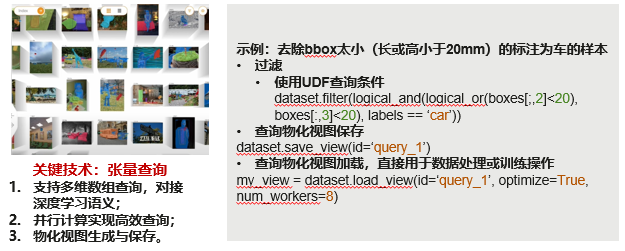

### Filter

#### CIFAR10

In [43]:
ds_cifar = muller.load("/data/muller_exp/cifar10/muller/train/")
ds_cifar.summary()


 tensor      htype           shape          dtype  compression
 -------    -------         -------        -------  ------- 
 images      image     (50000, 32, 32, 3)   uint8    jpeg   
 labels   class_label      (50000, 1)      uint32    None   


**(1) Using User Defined Function (UDF) as confitions**

***Case 1: CIFAR10, Select samples with class_label = 1***

In [44]:
start = time.time()
ds_cifar_1 = ds_cifar.filter(lambda sample: sample.labels.data()['value']==1)
end = time.time()
print("\n Time to do the filter operation: {}s. \n".format(end-start))
ds_cifar_1.summary(force=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:07<00:00, 6365.13it/s]


 Time to do the filter operation: 7.865421295166016s. 


 tensor      htype           shape         dtype  compression
 -------    -------         -------       -------  ------- 
 images      image     (5000, 32, 32, 3)   uint8    jpeg   
 labels   class_label      (5000, 1)      uint32    None   


***Case 2: CIFAR10, Select samples with class_label = 1 or class_label = 8***

In [180]:
start = time.time()
ds_cifar_3 = ds_cifar.filter(lambda sample: sample.labels.data()["value"]==1 or sample.labels.data()["value"]==8)
end = time.time()
print("\n Time to do the filter operation: {}s. \n".format(end-start))
ds_cifar_3.summary(force=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:13<00:00, 3673.23it/s]


 Time to do the filter operation: 13.619523048400879s. 


 tensor      htype           shape          dtype  compression
 -------    -------         -------        -------  ------- 
 images      image     (10000, 32, 32, 3)   uint8    jpeg   
 labels   class_label      (10000, 1)      uint32    None   


**(2) Using strings as condition**

***Case 1: Select samples with class_label = 1***

In [45]:
start = time.time()
ds_cifar_2 = ds_cifar.filter("labels == 1")
end = time.time()
print("\n Time to do the filter operation: {}s. \n".format(end-start))
ds_cifar_2.summary(force=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:06<00:00, 7691.58it/s]


 Time to do the filter operation: 6.508997678756714s. 


 tensor      htype           shape         dtype  compression
 -------    -------         -------       -------  ------- 
 images      image     (5000, 32, 32, 3)   uint8    jpeg   
 labels   class_label      (5000, 1)      uint32    None   


***Case 2: Select samples with class_label = 1 or class_label = 8***

In [67]:
start = time.time()
ds_cifar_4 = ds_cifar.filter("labels == 1 or labels == 8")
end = time.time()
print("\n Time to do the filter operation: {}s. \n".format(end-start))
ds_cifar_4.summary(force=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:06<00:00, 7187.37it/s]


 Time to do the filter operation: 6.967019319534302s. 


 tensor      htype           shape          dtype  compression
 -------    -------         -------        -------  ------- 
 images      image     (10000, 32, 32, 3)   uint8    jpeg   
 labels   class_label      (10000, 1)      uint32    None   


#### COCO2017

In [104]:
ds_coco = muller.load("/data/muller_exp/coco2017/muller/val/")
ds_coco.summary()


    tensor        htype                 shape               dtype  compression
   -------       -------               -------             -------  ------- 
     area        generic            (5000, 1:63)           float32    lz4   
     bbox         bbox             (5000, 1:63, 4)         float32    lz4   
 category_id   class_label          (5000, 1:63)           uint32     lz4   
      id         generic            (5000, 1:63)            int64     lz4   
   image_id      generic              (5000, 1)             int64     lz4   
    images        image     (5000, 145:640, 200:640, 1:3)   uint8    jpeg   
   iscrowd       generic            (5000, 1:63)            int64     lz4   
 segmentation     list              (5000, 1:63)             str     None   


In [105]:
ds_coco_train = muller.load("/data/muller_exp/coco2017/muller/train/")
ds_coco_train.summary()


    tensor        htype                 shape               dtype  compression
   -------       -------               -------             -------  ------- 
     area        generic           (118287, 1:93)          float32    lz4   
     bbox         bbox            (118287, 1:93, 4)        float32    lz4   
 category_id   class_label         (118287, 1:93)          uint32     lz4   
      id         generic           (118287, 1:93)           int64     lz4   
   image_id      generic             (118287, 1)            int64     lz4   
    images        image     (118287, 51:640, 59:640, 1:3)   uint8    jpeg   
   iscrowd       generic           (118287, 1:93)           int64     lz4   
 segmentation     list             (118287, 1:93)            str     None   


**(1) Using User Defined Function (UDF) as confitions**

***Case 1: Select samples that contains objects belong to category_id = 1.***

In [106]:
specific_id = 1
start = time.time()
ds_coco_1 = ds_coco.filter(lambda sample: specific_id in sample.category_id.data()['value'])
end = time.time()
print("\n Time to do the filter operation: {}s. \n".format(end-start))
ds_coco_1.summary()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:05<00:00, 982.00it/s]



 Time to do the filter operation: 5.099292993545532s. 


    tensor        htype                 shape               dtype  compression
   -------       -------               -------             -------  ------- 
     area        generic            (2693, 1:56)           float32    lz4   
     bbox         bbox             (2693, 1:56, 4)         float32    lz4   
 category_id   class_label          (2693, 1:56)           uint32     lz4   
      id         generic            (2693, 1:56)            int64     lz4   
   image_id      generic              (2693, 1)             int64     lz4   
    images        image     (2693, 145:640, 200:640, 1:3)   uint8    jpeg   
   iscrowd       generic            (2693, 1:56)            int64     lz4   
 segmentation     list              (2693, 1:56)             str     None   


***Case 2: Select samples that contains more than 10 bounding boxes.***

In [107]:
min_bbox = 10
start = time.time()
ds_coco_2 = ds_coco.filter(lambda sample: len(sample.bbox.data()['value']) > min_bbox)
end = time.time()
print("\n Time to do the filter operation: {}s. \n".format(end-start))
ds_coco_2.summary()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 3279.17it/s]



 Time to do the filter operation: 1.5328025817871094s. 


    tensor        htype                 shape               dtype  compression
   -------       -------               -------             -------  ------- 
     area        generic            (1198, 11:63)          float32    lz4   
     bbox         bbox            (1198, 11:63, 4)         float32    lz4   
 category_id   class_label          (1198, 11:63)          uint32     lz4   
      id         generic            (1198, 11:63)           int64     lz4   
   image_id      generic              (1198, 1)             int64     lz4   
    images        image     (1198, 194:640, 240:640, 1:3)   uint8    jpeg   
   iscrowd       generic            (1198, 11:63)           int64     lz4   
 segmentation     list              (1198, 11:63)            str     None   


***Case 3: Select samples that none of the annotated objects are from part of the crowds.***

In [108]:
flag = 1
start = time.time()
ds_coco_3 = ds_coco.filter(lambda sample: 1 not in sample.iscrowd.data()['value'])
end = time.time()
print("\n Time to do the filter operation: {}s. \n".format(end-start))
ds_coco_3.summary()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 3062.38it/s]



 Time to do the filter operation: 1.6397907733917236s. 


    tensor        htype                 shape               dtype  compression
   -------       -------               -------             -------  ------- 
     area        generic            (4589, 1:41)           float32    lz4   
     bbox         bbox             (4589, 1:41, 4)         float32    lz4   
 category_id   class_label          (4589, 1:41)           uint32     lz4   
      id         generic            (4589, 1:41)            int64     lz4   
   image_id      generic              (4589, 1)             int64     lz4   
    images        image     (4589, 145:640, 200:640, 1:3)   uint8    jpeg   
   iscrowd       generic            (4589, 1:41)            int64     lz4   
 segmentation     list              (4589, 1:41)             str     None   


***Case 4: Combine the above filters.***

In [109]:
start = time.time()
ds_coco_7 = ds_coco.filter(lambda sample: (1 in sample.iscrowd.data()['value']) and (1 in sample.bbox.data()['value']))
end = time.time()
print("\n Time to do the filter operation: {}s. \n".format(end-start))
ds_coco_7.summary()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 3009.28it/s]



 Time to do the filter operation: 1.668877363204956s. 


    tensor        htype                shape              dtype  compression
   -------       -------              -------            -------  ------- 
     area        generic            (72, 15:43)          float32    lz4   
     bbox         bbox            (72, 15:43, 4)         float32    lz4   
 category_id   class_label          (72, 15:43)          uint32     lz4   
      id         generic            (72, 15:43)           int64     lz4   
   image_id      generic              (72, 1)             int64     lz4   
    images        image     (72, 213:640, 240:640, 1:3)   uint8    jpeg   
   iscrowd       generic            (72, 15:43)           int64     lz4   
 segmentation     list              (72, 15:43)            str     None   


In [110]:
start = time.time()
ds_coco_8 = ds_coco.filter(lambda sample: (1 in sample.iscrowd.data()['value']) or (len(sample.bbox.data()['value']) > 5))
end = time.time()
print("\n Time to do the filter operation: {}s. \n".format(end-start))
ds_coco_8.summary()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:02<00:00, 2146.09it/s]



 Time to do the filter operation: 2.339325428009033s. 


    tensor        htype                 shape               dtype  compression
   -------       -------               -------             -------  ------- 
     area        generic            (2183, 6:63)           float32    lz4   
     bbox         bbox             (2183, 6:63, 4)         float32    lz4   
 category_id   class_label          (2183, 6:63)           uint32     lz4   
      id         generic            (2183, 6:63)            int64     lz4   
   image_id      generic              (2183, 1)             int64     lz4   
    images        image     (2183, 159:640, 240:640, 1:3)   uint8    jpeg   
   iscrowd       generic            (2183, 6:63)            int64     lz4   
 segmentation     list              (2183, 6:63)             str     None   


***Case 5: Combine the above filters in parallel mode (comparison with val & train, under improvement)***

In [51]:
target_num = 1
start = time.time()
@muller.compute
def filter_labels(sample_in, target_num):
    return (target_num in sample_in.iscrowd.data()['value']) or (len(sample_in.bbox.data()['value']) > 5)
ds_val_0 = ds_coco.filter(filter_labels(target_num))
end = time.time()
print("\n Time to do the filter operation in parallel mode is: {}s. \n".format(end-start))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:02<00:00, 2069.72it/s]


 Time to do the filter operation in parallel mode is: 2.4231739044189453s. 



In [52]:
target_num = 1
start = time.time()
@muller.compute
def filter_labels(sample_in, target_num):
    return (target_num in sample_in.iscrowd.data()['value']) or (len(sample_in.bbox.data()['value']) > 5)
ds_train_0 = ds_coco_train.filter(filter_labels(target_num))
end = time.time()
print("\n Time to do the filter operation in parallel mode is: {}s. \n".format(end-start))

NameError: name 'ds_coco_train' is not defined

In [111]:
target_num = 1
start = time.time()
@muller.compute
def filter_labels(sample_in, target_num):
    return (target_num in sample_in.iscrowd.data()['value']) or (len(sample_in.bbox.data()['value']) > 5)
ds_val_2 = ds_coco.filter(filter_labels(target_num), num_workers=2)
end = time.time()
print("\n Time to do the filter operation in parallel mode with 2 workers: {}s. \n".format(end-start))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:02<00:00



 Time to do the filter operation in parallel mode with 2 workers: 2.9804978370666504s. 



In [ ]:
target_num = 1
start = time.time()
@muller.compute
def filter_labels(sample_in, target_num):
    return (target_num in sample_in.iscrowd.data()['value']) or (len(sample_in.bbox.data()['value']) > 5)
ds_train_2 = ds_coco_train.filter(filter_labels(target_num), num_workers=2)
end = time.time()
print("\n Time to do the filter operation in parallel mode with 2 workers: {}s. \n".format(end-start))

In [55]:
target_num = 1
start = time.time()
@muller.compute
def filter_labels(sample_in, target_num):
    return (target_num in sample_in.iscrowd.data()['value']) or (len(sample_in.bbox.data()['value']) > 5)
ds_val_4 = ds_coco.filter(filter_labels(target_num), num_workers=4)
end = time.time()
print("\n Time to do the filter operation in parallel mode with 4 workers: {}s. \n".format(end-start))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:02<00:00



 Time to do the filter operation in parallel mode with 4 workers: 3.31600284576416s. 



**(2) Using strings as condition**

***Case 1: Select samples that contains objects belong to category_id = 1.***

In [112]:
start = time.time()
ds_coco_4 = ds_coco.filter("1 in category_id")
end = time.time()
print("\n Time to do the filter operation: {}s. \n".format(end-start))
ds_coco_4.summary()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:05<00:00, 915.55it/s]



 Time to do the filter operation: 5.471049070358276s. 


    tensor        htype                 shape               dtype  compression
   -------       -------               -------             -------  ------- 
     area        generic            (2693, 1:56)           float32    lz4   
     bbox         bbox             (2693, 1:56, 4)         float32    lz4   
 category_id   class_label          (2693, 1:56)           uint32     lz4   
      id         generic            (2693, 1:56)            int64     lz4   
   image_id      generic              (2693, 1)             int64     lz4   
    images        image     (2693, 145:640, 200:640, 1:3)   uint8    jpeg   
   iscrowd       generic            (2693, 1:56)            int64     lz4   
 segmentation     list              (2693, 1:56)             str     None   


***Case 2: Select samples that contains more than 10 bounding boxes.***

Note: string cannot handle this complicated query, so we suggest to use UDF.

In [ ]:
start = time.time()
ds_coco_5 = ds_coco.filter("bbox.sample_info['shape'][0] > 10")  
end = time.time()
print("\n Time to do the filter operation: {}s. \n".format(end-start))
ds_coco_5.summary()

***Case 3: Select samples that none of the annotated objects are from part of the crowds.***

In [113]:
start = time.time()
ds_coco_6 = ds_coco.filter("1 not in iscrowd")
end = time.time()
print("\n Time to do the filter operation: {}s. \n".format(end-start))
ds_coco_6.summary()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:05<00:00, 939.89it/s]



 Time to do the filter operation: 5.33037543296814s. 


    tensor        htype                 shape               dtype  compression
   -------       -------               -------             -------  ------- 
     area        generic            (4589, 1:41)           float32    lz4   
     bbox         bbox             (4589, 1:41, 4)         float32    lz4   
 category_id   class_label          (4589, 1:41)           uint32     lz4   
      id         generic            (4589, 1:41)            int64     lz4   
   image_id      generic              (4589, 1)             int64     lz4   
    images        image     (4589, 145:640, 200:640, 1:3)   uint8    jpeg   
   iscrowd       generic            (4589, 1:41)            int64     lz4   
 segmentation     list              (4589, 1:41)             str     None   


***Case 4: Combine the above filters.***

In [114]:
start = time.time()
ds_coco_11 = ds_coco.filter("1 in category_id and 1 not in iscrowd")
end = time.time()
print("\n Time to do the filter operation: {}s. \n".format(end-start))
ds_coco_11.summary()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:08<00:00, 607.85it/s]



 Time to do the filter operation: 8.235506296157837s. 


    tensor        htype                 shape               dtype  compression
   -------       -------               -------             -------  ------- 
     area        generic            (2369, 1:41)           float32    lz4   
     bbox         bbox             (2369, 1:41, 4)         float32    lz4   
 category_id   class_label          (2369, 1:41)           uint32     lz4   
      id         generic            (2369, 1:41)            int64     lz4   
   image_id      generic              (2369, 1)             int64     lz4   
    images        image     (2369, 145:640, 200:640, 1:3)   uint8    jpeg   
   iscrowd       generic            (2369, 1:41)            int64     lz4   
 segmentation     list              (2369, 1:41)             str     None   


### **子目标（3）：数据版本管理**
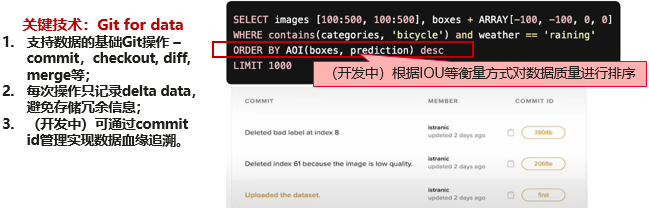

### Version Control (Take a numy array list as an example)

#### Local Test

*Commit*

In [59]:
ds = muller.dataset(path='/data/muller_test_0118', overwrite=True)
ds.create_tensor(name="array_1")
ds.array_1.append([1, 2, 3])
first_commit = ds.commit()
print(first_commit)

firstdbf9474d461a19e9333c2fd19b46115348f


In [60]:
ds.array_1.append([4, 5, 6])
second_commit = ds.commit()
print(second_commit)

bb015c999e55691e17bb08a3745fbe541dc226d1


*Checkout*

In [61]:
ds.checkout("dev", create=True)
print(f'Successfully checked out to the branch: {ds.branch}\n'+
      f'Now all the branches of the dataset are: {ds.branches}')

Successfully checked out to the branch: dev
Now all the branches of the dataset are: ['main', 'dev']


*Diff*

In [62]:
ds.array_1.append([7, 8, 9])
third_commit = ds.commit()
ds.array_1.append([10, 11, 12])
fourth_commit = ds.commit()
print(f"The differences between {fourth_commit} and {third_commit} are \n"
      f"{ds.diff(third_commit, fourth_commit, as_dict=True)}\n")

The differences between 9527427dfc95876d0b3f9b87d940cae54ab8e009 and 51cb82383c6abfa1ac8cc7f66b77b44e24574ec0 are 
{'dataset': ([], [{'commit_id': '9527427dfc95876d0b3f9b87d940cae54ab8e009', 'author': 'public', 'message': None, 'date': '2024-04-08 06:11:41', 'info_updated': False, 'renamed': {}, 'deleted': []}]), 'tensor': ([], [{'commit_id': '9527427dfc95876d0b3f9b87d940cae54ab8e009', 'array_1': {'created': False, 'cleared': False, 'info_updated': False, 'data_added': [3, 4], 'data_updated': set(), 'data_deleted': set(), 'data_transformed_in_place': False}}])}



*Merge*

In [63]:
ds.checkout("main")
ds.merge(target_id='dev', conflict_resolution=None, delete_removed_tensors=False, force=False)
print('After Fast Forward Merge with dev, current branch is on: {}.\n The returned data is: {}'
       .format(ds.branch, ds.array_1.numpy(aslist=True)))

After Fast Forward Merge with dev, current branch is on: main.
 The returned data is: [array([1, 2, 3]), array([4, 5, 6]), array([7, 8, 9]), array([10, 11, 12])]


In [64]:
ds.branch

'main'

In [65]:
ds.array_1.numpy()

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

#### Roma Test

In [67]:
ds = muller.dataset(path='roma://data/muller_test_0409/', creds=credential_info, overwrite=True)
ds.create_tensor(name="array_1")
ds.array_1.append([1, 2, 3])
first_commit = ds.commit()
print(first_commit)

\

firstdbf9474d461a19e9333c2fd19b46115348f


### **子目标（4）：流式数据处理与加载 - 开发与验证中，有助于将一个大模型场景的数据处理串联起来**
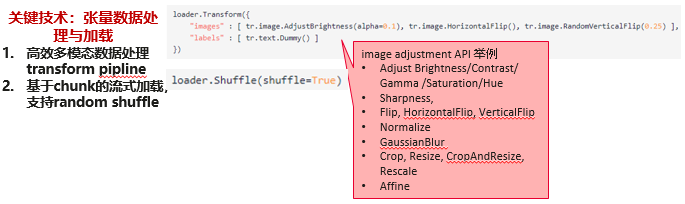

### **其他特性**

#### ds.create_tensor(downsampling=(tuple[int, int]))

**Example**: Assume the selected image is of size ```(w, h)```, and the parameter ```downsampling``` is set to ```(x, y)```. Then the image will be divided into int(w/x) * int(h/y)  blocks, and only one pixel will be reserved in each block. The dividing process will be conducted for y times. And the dividing factor will be ```x to the powers of 0```, ```x to the powers of 1```, till ```x to the powers of (y-1)```. 
Then ```y``` files will be generated with the name ```_[tensor_name]_downsampled_x^0```, ```_[tensor_name]_downsampled_x^1```, …, ```_[tensor_name]_downsampled_x^(y-1)```. It is worth noting that the number of ```x^n (n = 0, 1, …, y-1)``` is larger, the resolution of the obtained images is smaller.
In addition, ```int(w/(x^(n)))``` and ```int(h/(x^(n)))``` cannot be too small, or the downsampling operation cannot be conducted.

In [33]:
import muller
import numpy as np
import os

ds_1 = muller.dataset('/data/muller_issues/animals_downsampling', overwrite=True)
dataset_folder = '/data/animals'

class_names = [item for item in os.listdir(dataset_folder) if os.path.isdir(os.path.join(dataset_folder, item))]
files_list = []

for dirpath, dirnames, filenames in os.walk(
        dataset_folder):  # dirpath: root path, dirnames: sub folders, filenames: file names
    for filename in filenames:  # when filenames is not None, it means dirnames is none
        files_list.append(os.path.join(dirpath, filename))

with ds_1:
    ds_1.create_tensor('images', htype='image', sample_compression='jpeg', downsampling = (2,5))
    ds_1.create_tensor('labels', htype='class_label', class_names=class_names)

with ds_1:
    for file in files_list:  # absolute path to the image
        label_text = os.path.basename(
            os.path.dirname(file))  # return the tail of the dir of the image (i.e., dogs, cats)
        label_num = class_names.index(label_text)  # get the index of the text in the class_name string
        ds_1.images.append(muller.read(file))
        ds_1.labels.append(np.uint32(label_num))


(1026, 640, 3)


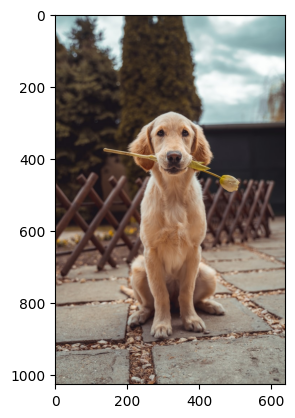

In [2]:
import matplotlib.pyplot as plt
plt.imshow(ds_1.images[0].numpy())
print(ds_1.images[0].numpy().shape)

(513, 320, 3)


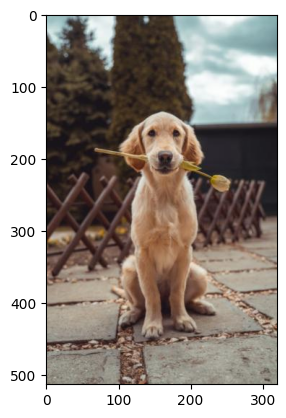

In [3]:
plt.imshow(ds_1._images_downsampled_2[0].numpy())
print(ds_1._images_downsampled_2[0].numpy().shape)

(256, 160, 3)


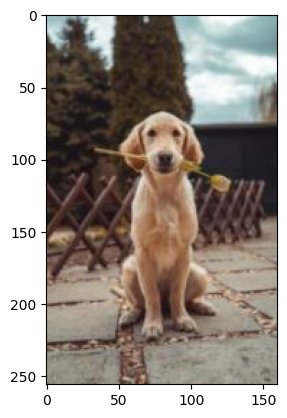

In [4]:
plt.imshow(ds_1._images_downsampled_4[0].numpy())
print(ds_1._images_downsampled_4[0].numpy().shape)

(64, 40, 3)


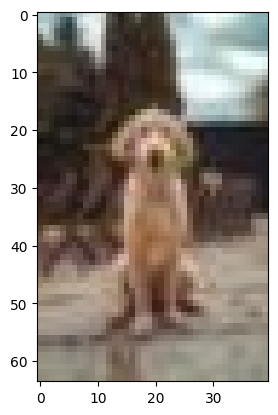

In [5]:
plt.imshow(ds_1._images_downsampled_16[0].numpy())
print(ds_1._images_downsampled_16[0].numpy().shape)

(32, 20, 3)


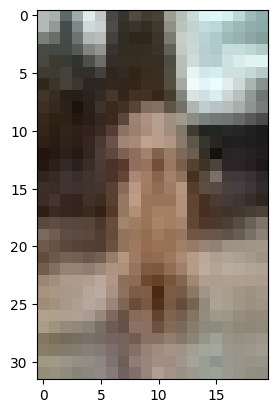

In [6]:
plt.imshow(ds_1._images_downsampled_32[0].numpy())
print(ds_1._images_downsampled_32[0].numpy().shape)